### Student Information
Name: 林劭芸

Student ID: 113033626

GitHub ID: dabbie109303501

Kaggle name: Rilakkuma-dabbie

Kaggle private scoreboard snapshot: 
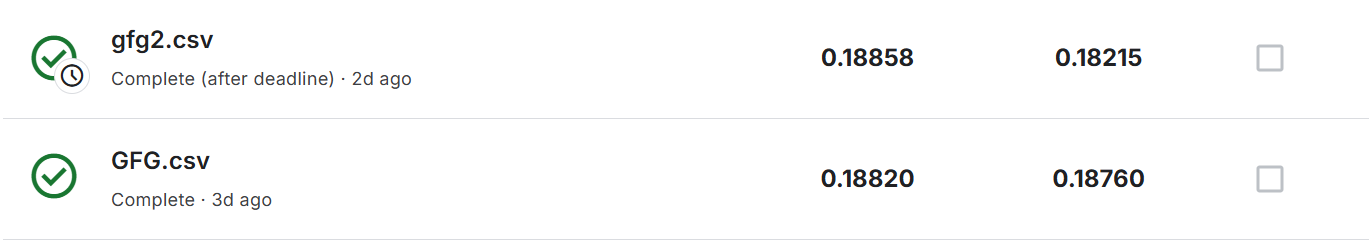

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

In [156]:
import pandas as pd

### training data
anger_train = pd.read_csv("semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

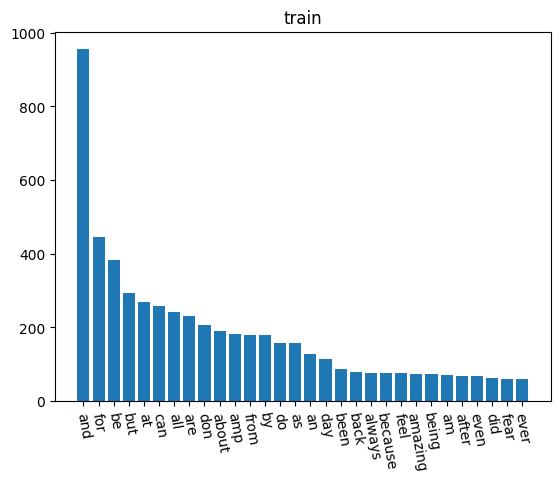

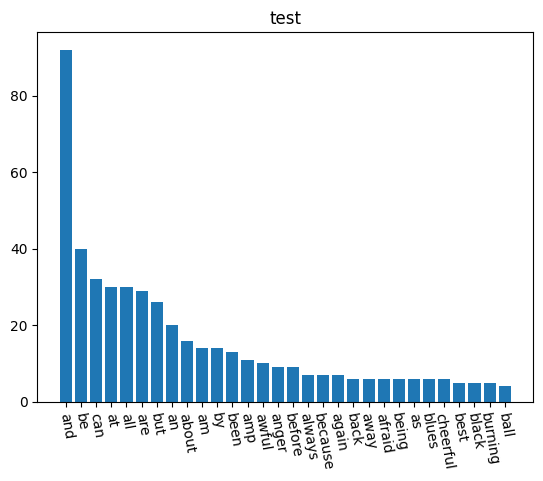

In [157]:
# Exercise 1 
# Plot word frequency for Top 30 words in both train and test dataset.
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
count_vect = CountVectorizer()
trax_counts = count_vect.fit_transform(train_df["text"])
tra_arr=trax_counts.toarray()
tra_so=[sum(tra_arr[:,i]) for i in range(len(train_df))]
tra_sorind=np.argsort(tra_so)
tra_y=[so[i] for i in tra_sorind[len(tra_so)-30:len(tra_so)]]
tra_y.reverse()
tra_x=[count_vect.get_feature_names_out()[i] 
       for i in tra_sorind[len(tra_so)-30:len(tra_so)]]
tra_x.reverse()
plt.bar(tra_x,tra_y)
plt.title("train")
plt.xticks(rotation = -80)
plt.show()

tesx_counts = count_vect.fit_transform(test_df["text"])
tes_arr=tesx_counts.toarray()
tes_so=[sum(tes_arr[:,i]) for i in range(len(test_df))]
tes_sorind=np.argsort(tes_so)
tes_y=[tes_so[i] for i in tes_sorind[len(tes_so)-30:len(tes_so)]]
tes_y.reverse()
tes_x=[count_vect.get_feature_names_out()[i] 
   for i in tes_sorind[len(tes_so)-30:len(tes_so)]]
tes_x.reverse()
plt.bar(tes_x,tes_y)
plt.title("test")
plt.xticks(rotation = -80)
plt.show()

In [158]:
train_df.groupby(['emotion']).count()['text']
from sklearn.feature_extraction.text import CountVectorizer
import nltk
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
BOW_500.fit(train_df['text']) 
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])
feature_names_500 = BOW_500.get_feature_names_out()
"😂" in feature_names_500

True

In [159]:
# Exercise 2 
# Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110]
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
tfidf_vectorizer.fit_transform(train_df['text']) 
print("train",tfidf_vectorizer.get_feature_names_out()[100:110])
tfidf_vectorizer.fit_transform(test_df['text']) 
print("test",tfidf_vectorizer.get_feature_names_out()[100:110])

train ['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']
test ['appreciated' 'arch' 'are' 'arms' 'around' 'as' 'asked' 'assistance' 'at'
 'attempt']


training accuracy: 0.99
testing accuracy: 0.68
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



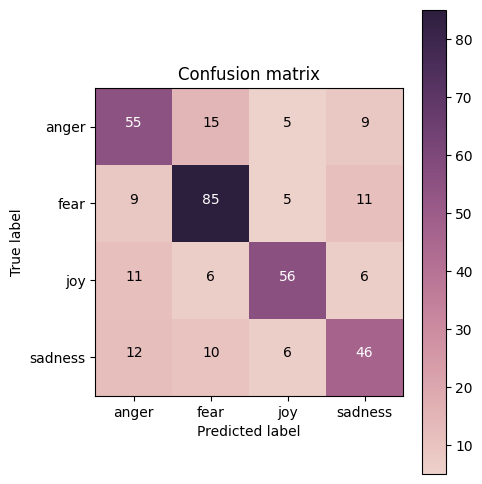

In [160]:
from sklearn.tree import DecisionTreeClassifier
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']
DT_model = DecisionTreeClassifier(random_state=1)
DT_model = DT_model.fit(X_train, y_train)
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)
y_test_pred[:10]
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_test_pred))
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

#### Exercise 3 
#### Can you interpret the results above? What do they mean?

* TP->true positive 正確的分成正確的
* FP->false positive 錯誤的分成正確的
* TN->true negative 正確的分類成錯誤的
* FN->false negative 錯誤的分類成錯誤的
* accuracy->(TP+TN)/ALL 所有分類正確的比例
* precision->TP/(TP+FP) 分類正確中 真正正確的比例
* recall->TP/(TP+FN) 所有正確中 預測出正確的比例
* f1-score->2*Precision*Recall/(Precision + Recall)
* support->各emotion的樣本數
* macro avg-> ∑ precision/4 宏觀平均
* weighted avg-> ∑ each precision*support / ∑ support 加權平均
* confusion_matrix-><br>
anger被分類成anger fear joy sadness 的數量<br>
fear被分類成anger fear joy sadness 的數量<br>
joy被分類成anger fear joy sadness 的數量<br>
sadness被分類成anger fear joy sadness 的數量

training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



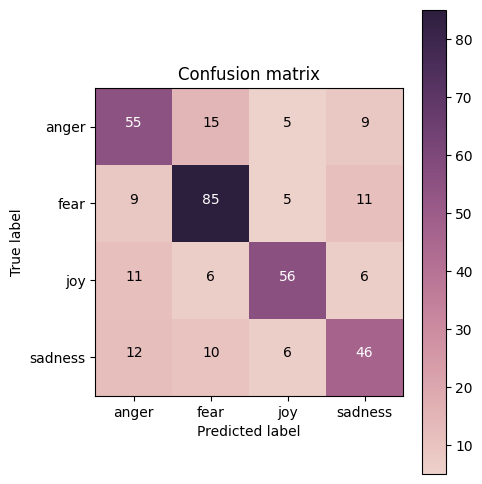

In [161]:
# Exercise 4 (Take home):
# Build a model using a `Naive Bayes` model and train it. What are the testing results?
from sklearn.naive_bayes import MultinomialNB
DT_model=clf = MultinomialNB()
DT_model=clf.fit(X_train, y_train)
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print(classification_report(y_true=y_test, y_pred=y_test_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

#### Exercise 5 
#### How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

* Decision Tree model -> DT
* Naive Bayes model -> NB
1. accuracy->
 - training: DT 0.99 > NB 0.79
 - testing: DT 0.68 < NB 0.7
2. precision->
 - anger: DT 0.66 > NB 0.63
 - fear: DT 0.66 < NB 0.73
 - joy: DT 0.72 < NB 0.78
 - sadness: DT 0.7 < NB 0.64
3. recall->
 - anger: DT 0.68 > NB 0.65
 - fear: DT 0.69 < NB 0.77
 - joy: DT 0.71 = NB 0.71
 - sadness: DT 0.64 < NB 0.62
4. f1-score->
 - anger: DT 0.67 > NB 0.64
 - fear: DT 0.67 < NB 0.75
 - joy: DT 0.71 < NB 0.74 
 - sadness: DT 0.67 > NB 0.63 
5. support->the same
6. macro avg->
 - precision: DT 0.68 < NB 0.7
 - recall: DT 0.68 NB < 0.69
 - f1-score: DT 0.68 < NB 0.69
7. weighted avg->
 - precision: DT 0.68 < NB 0.7
 - recall: DT 0.68 < NB 0.7
 - f1-score: DT 0.68 < NB 0.7

Totally, Naive Bayes model better than Decision Tree model a little bit



In [162]:
import keras
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)
def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)
input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
model_input = Input(shape=(input_shape, )) 
X = model_input
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)
model_output = H3
model = Model(inputs=[model_input], outputs=[model_output])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

from keras.callbacks import CSVLogger
csv_logger = CSVLogger('logs/training_log.csv')
epochs = 25
batch_size = 32
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_9 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_4 (Softmax)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3538 - loss: 1.3510 - val_accuracy: 0.4380 - val_loss: 1.2645
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5993 - loss: 1.0558 - val_accuracy: 0.6282 - val_loss: 0.9238
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7823 - loss: 0.6390 - val_accuracy: 0.6744 - val_loss: 0.7985
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8471 - loss: 0.4232 - val_accuracy: 0.6657 - val_loss: 0.8012
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8846 - loss: 0.3429 - val_accuracy: 0.6945 - val_loss: 0.8262
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9223 - loss: 0.2609 - val_accuracy: 0.6715 - val_loss: 0.8569
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9250 - loss: 0.2190 - val_accuracy: 0.6801 - val_loss: 0.9323
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9421 - loss: 0.1892 - val_accuracy: 0.

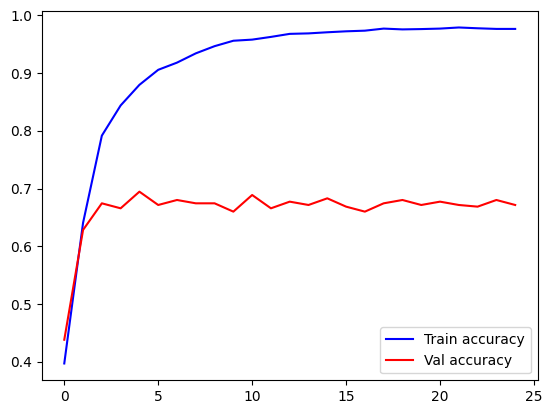

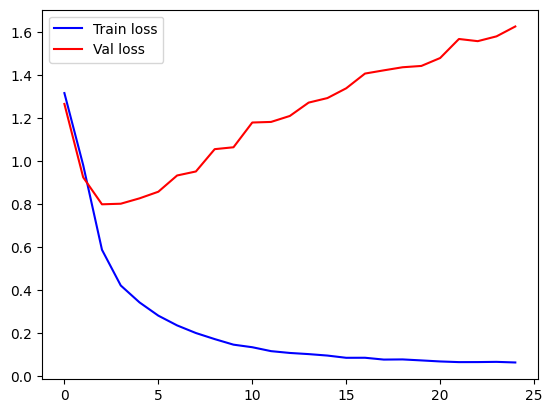

In [163]:
# Exercise 6
# Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
log=pd.read_csv('logs/training_log.csv')
plt.plot(log["epoch"],log["accuracy"],'b-')
plt.plot(log["epoch"],log["val_accuracy"],'r-')
plt.legend(['Train accuracy','Val accuracy'])
plt.show()
plt.plot(log["epoch"],log["loss"],'b-')
plt.plot(log["epoch"],log["val_loss"],'r-')
plt.legend(['Train loss','Val loss'])
plt.show()

In [171]:
import gensim
import warnings
warnings.filterwarnings('ignore')
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()
training_corpus = train_df['text_tokenized'].values

from gensim.models import Word2Vec
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)
word_vec = word2vec_model.wv['happy']
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

from gensim.models import KeyedVectors
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

load ok


[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

#### Exercise 7 
#### Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
#### How can we utilize these "word" vectors to represent the sentence data and train our model?

- Use RNNs (e.g., LSTMs, GRUs) to process the sequence of word -vectors 
- Transformers
- Convolutional Neural Networks

In [191]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]   
target_words = happy_words + angry_words + data_words + mining_words 
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn    

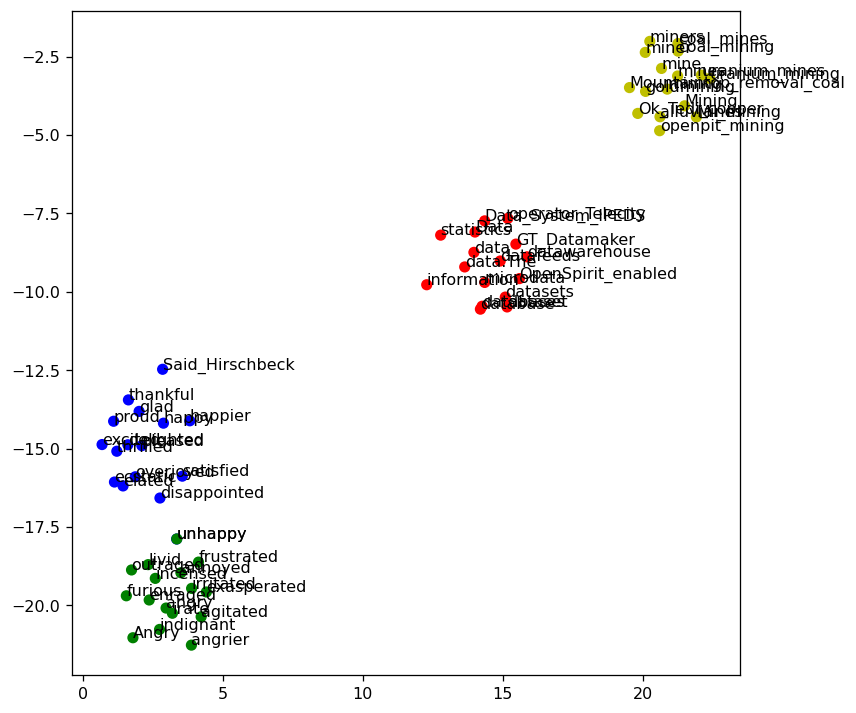

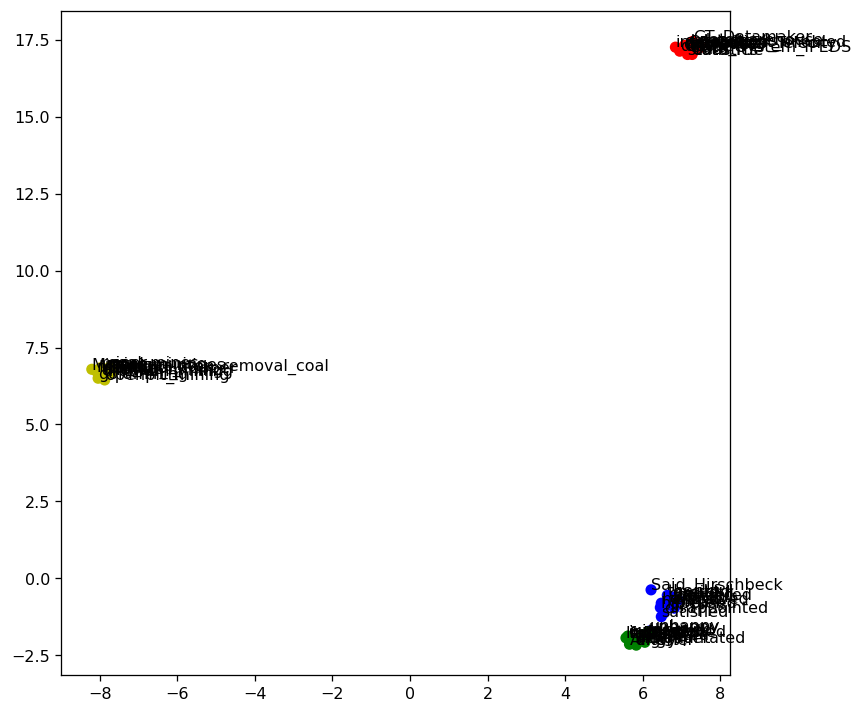

In [193]:
# Exercise 8
# Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.
from sklearn.manifold import TSNE
model = w2v_google_model
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(X_train)
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


import umap.umap_ as umap
model = w2v_google_model
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(X_train)
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# UMAP的分類比TSNE集中

In [196]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))
display(Markdown(response['message']['content']))

*some markdown* $\phi$

**Data Mining**
================

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to extract valuable information or knowledge from a dataset.

### Goals

The goals of data mining include:

* **Predictive analytics**: Using historical data to predict future events or behaviors.
* **Descriptive analytics**: Summarizing and describing patterns in the data.
* **Prescriptive analytics**: Recommending actions based on the insights gained from the data.

### Types of Data Mining

1. **Supervised Learning**: The algorithm is trained on labeled data to make predictions.
2. **Unsupervised Learning**: The algorithm discovers patterns without labeled data.
3. **Reinforcement Learning**: The algorithm learns through trial and error, interacting with an environment.

### Techniques Used in Data Mining

* **Clustering**: Grouping similar data points together.
* **Decision Trees**: Creating a tree-like model to classify data.
* **Association Rule Mining**: Discovering relationships between variables.
* **Text Mining**: Extracting insights from unstructured text data.

### Applications of Data Mining

* **Marketing**: Customer segmentation, recommendation systems.
* **Healthcare**: Disease diagnosis, personalized medicine.
* **Finance**: Fraud detection, risk assessment.
* **Customer Service**: Chatbots, sentiment analysis.

In [197]:
# Exercise 9
# You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.
#role: user vs assistant
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'assistant',
        'content': 'What is data mining? (in markdown format)'
    },
])
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))
display(Markdown(response['message']['content']))

*some markdown* $\phi$

 # Data Mining
=========================

Data mining is the process of discovering patterns, relationships, and insights from large datasets. It involves using various techniques to analyze and extract meaningful information from raw data.

## Types of Data Mining

There are several types of data mining, including:

*   **Supervised learning**: This type of machine learning involves training a model on labeled data to make predictions or classify new data.
*   **Unsupervised learning**: This type of machine learning involves analyzing unlabeled data to identify patterns and relationships.
*   **Semi-supervised learning**: This type of machine learning involves combining supervised and unsupervised learning techniques to improve performance.

## Data Mining Techniques

Some common data mining techniques include:

*   **Clustering**: This technique involves grouping similar data points together based on their characteristics.
*   **Association rule mining**: This technique involves identifying relationships between different variables in a dataset.
*   **Decision tree mining**: This technique involves creating a decision tree to classify new data.

## Benefits of Data Mining

Data mining has several benefits, including:

*   **Improved predictions and classifications**
*   **Identifying patterns and relationships**
*   **Reducing costs and increasing efficiency**

## Challenges of Data Mining

Data mining also presents several challenges, including:

*   **Handling large datasets**
*   **Dealing with missing data**
*   **Ensuring data quality**

## Applications of Data Mining

Data mining has numerous applications across various industries, including:

*   **Marketing**: Data mining is used to analyze customer behavior and preferences.
*   **Finance**: Data mining is used to analyze financial transactions and identify trends.
*   **Healthcare**: Data mining is used to analyze medical data and identify patterns.

## Conclusion

Data mining is a powerful tool for extracting insights from large datasets. By understanding the different types of data mining, techniques, benefits, challenges, and applications, organizations can unlock the full potential of their data to make informed decisions.

The image captures a charming scene of a small, light brown rabbit. The rabbit's ears are perked up, indicating curiosity or alertness, and it gazes directly into the camera, almost as if it's posing for a portrait. Its nose is pink, adding to its cuteness, and it has long white whiskers that stand out against its fur.

The rabbit is comfortably seated on a woven beige blanket. The texture of the blanket adds a cozy touch to the image. The background is blurred, drawing focus to the rabbit as the main subject of this photo.

Despite being an inanimate object, the rabbit seems lively and full of character, making for an endearing picture that captures its charm and innocence.

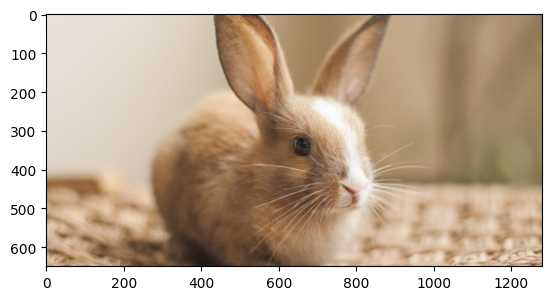

In [ ]:
# Exercise 10
# Try asking the model with one image of your choosing. Is the description accurate? Why?
response = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['img/10_rabbit.jpg'] #Image with the cat
    },
])
display(Markdown(response['message']['content']))
img=plt.imread("img/10_rabbit.jpg")
plt.imshow(img)
plt.show()

#its description is accurate

In [209]:
# Exercise 11 
# Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question,retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

llm_model = "llama3.2" #You can change to the one of your preference

url1="https://www.ibm.com/think/insights/hybrid-cloud-advantages-disadvantages"
url2="https://www.bbc.com/news/articles/c6277zz434zo"
url3="https://www.ibm.com/think/topics/ai-agents-vs-ai-assistants"
q1="What are the advantages of hybrid cloud?"
q2="Why did the president apology?"
q3="How AI assistants work?"
url=[url1,url2,url3]
q=[q1,q2,q3]
# Create the retriever
for i in range(3):
    retriever = load_and_retrieve_docs(url[i])
    # Use the RAG chain
    result = rag_chain(q[i],retriever)
    print("Q:",q[i])
    display(Markdown(result))
    print("--------------------")

Q: What are the advantages of hybrid cloud?


The advantages of hybrid cloud technology are:

1. Seamless integration: Hybrid cloud combines public cloud, private cloud, and on-premises infrastructure into a single solution, offering flexibility for running applications and workloads.
2. Portability: Hybrid cloud provides portability across different environments, allowing businesses to run their applications and workloads in various clouds as needed.
3. Improved capacity and performance: By leveraging the strengths of multiple cloud environments, hybrid cloud can provide increased capacity and improved overall performance.
4. Security and compliance: Hybrid cloud offers a combination of security features from public clouds, private clouds, and on-premises infrastructure, enabling businesses to meet strict privacy or regulatory compliance requirements.
5. Zero downtime: With container orchestration platforms like Kubernetes and Docker Swarm, hybrid multicloud architecture can provide zero downtime for applications and workloads.

Overall, the advantages of hybrid cloud technology enable businesses to create a flexible, scalable, and secure infrastructure that meets their specific needs and supports their application development strategies.

--------------------
Q: Why did the president apology?


There is no mention of a president apology in the provided text. The text appears to be discussing the role of IBM and webMethods in the integration platform as a service (iPaaS) market, and how they are leveraging expertise to help business leaders turn integration into a competitive advantage.

--------------------
Q: How AI assistants work?


AI assistants work by leveraging large language models (LLMs) that have been trained on massive amounts of text data. Here's a breakdown of how they operate:

1. **Training**: The LLM is trained on a vast corpus of text, which enables it to learn grammar, semantics, and conceptual relationships.
2. **Zero-shot and self-supervised learning**: During training, the LLM learns to predict the next word in a sequence based on the input it receives, using patterns and knowledge acquired from the training data.
3. **Text generation**: Once trained, the LLM can generate text by predicting the next word in a sequence, drawing on its learned patterns and knowledge. This allows it to create coherent and contextually relevant language.

The AI assistant's capabilities include:

* **Text generation**: generating mid-to-long form content, such as emails, blog posts, or other written content, based on prompts that can be refined and polished.
* **Language understanding (NLU)**: enabling businesses to harness LLMs for various tasks, including text analysis and processing.

The benefits of AI assistants and LLMs include:

* **Accessibility**: assisting individuals with disabilities through text-to-speech applications and generating content in accessible formats.
* **Industry transformation**: streamlining processes, improving customer experiences, and enabling data-driven decision making across various industries, such as healthcare and finance.

Overall, AI assistants and LLMs have the potential to transform businesses and industries by automating routine tasks, improving efficiency, and enhancing customer experiences.

--------------------


Q1 大致正確
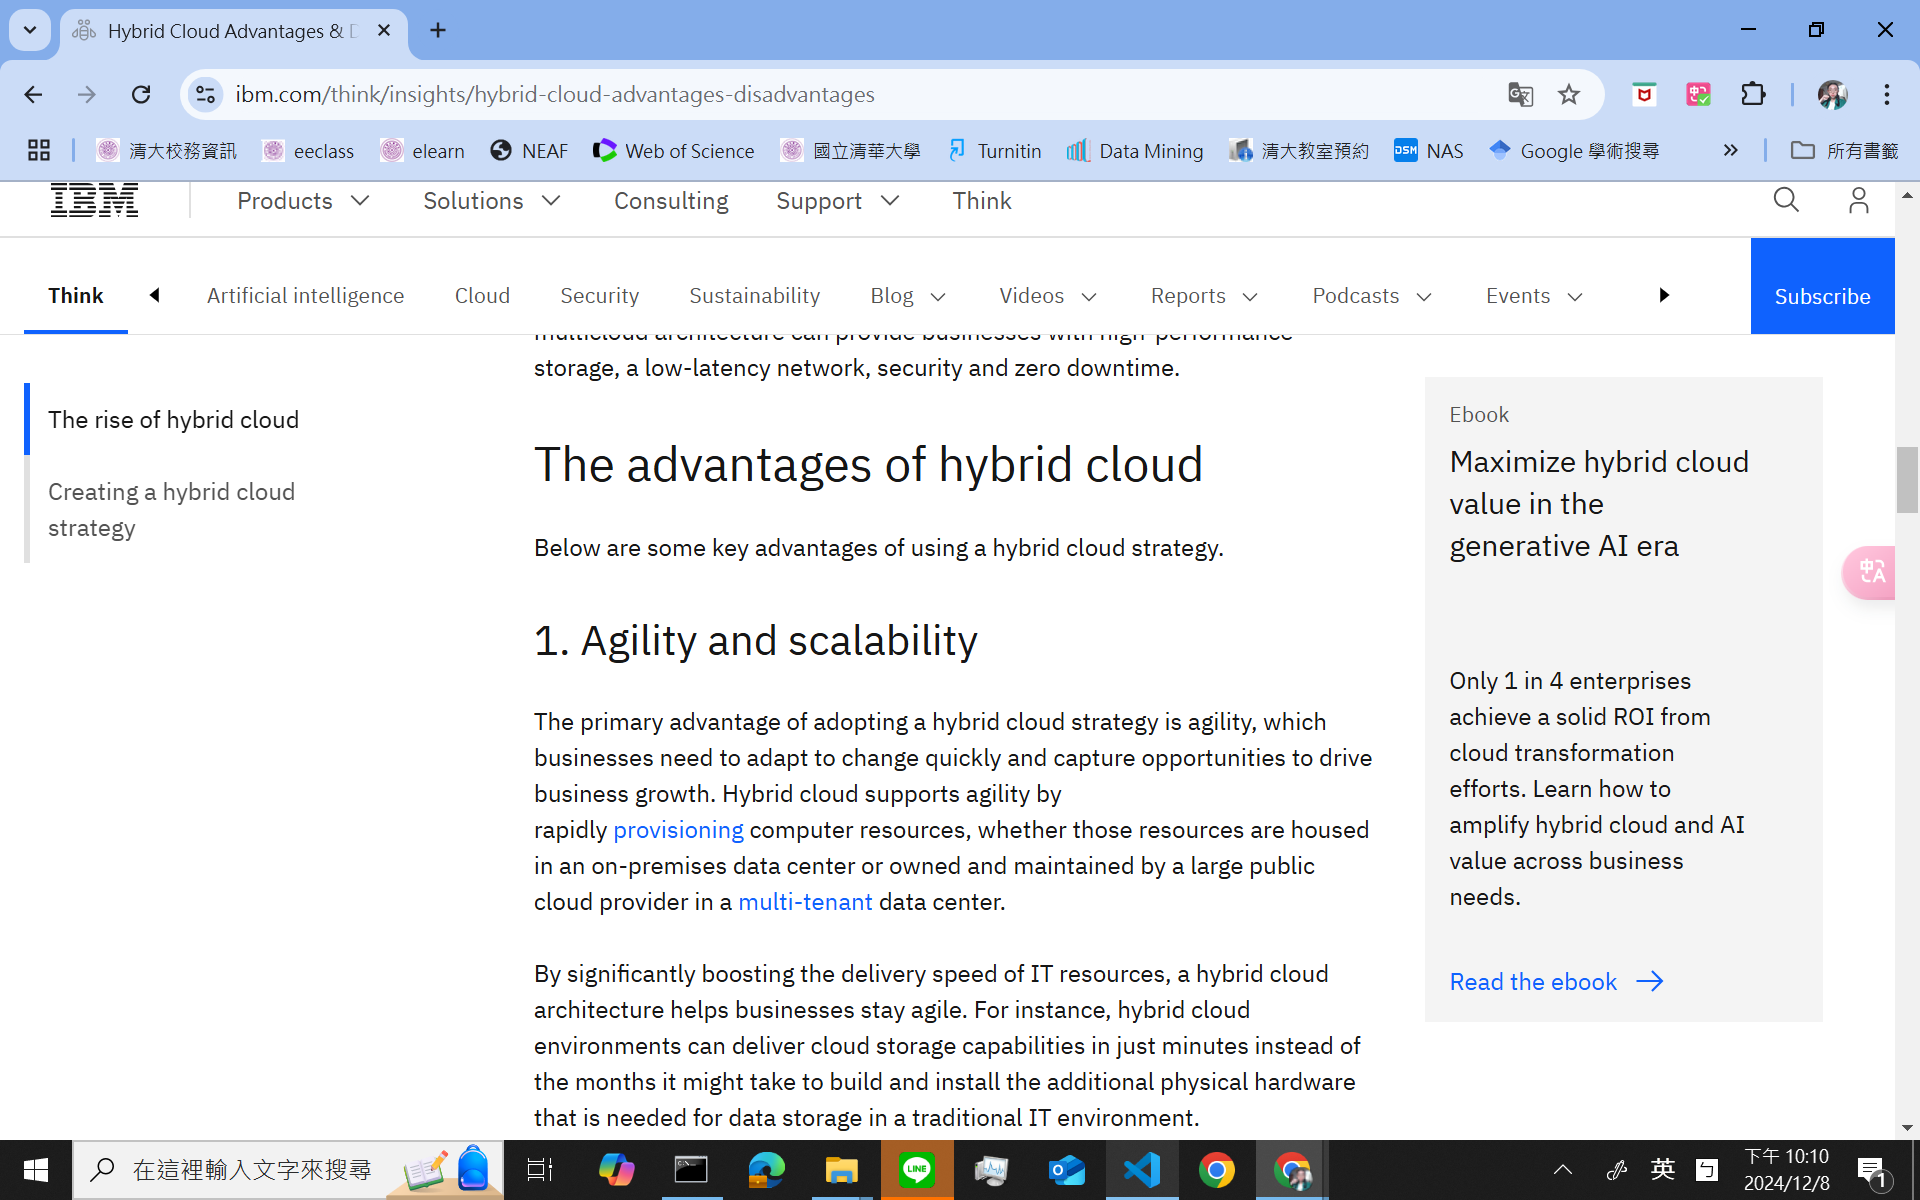
Q2 錯誤 但答案就在題目上
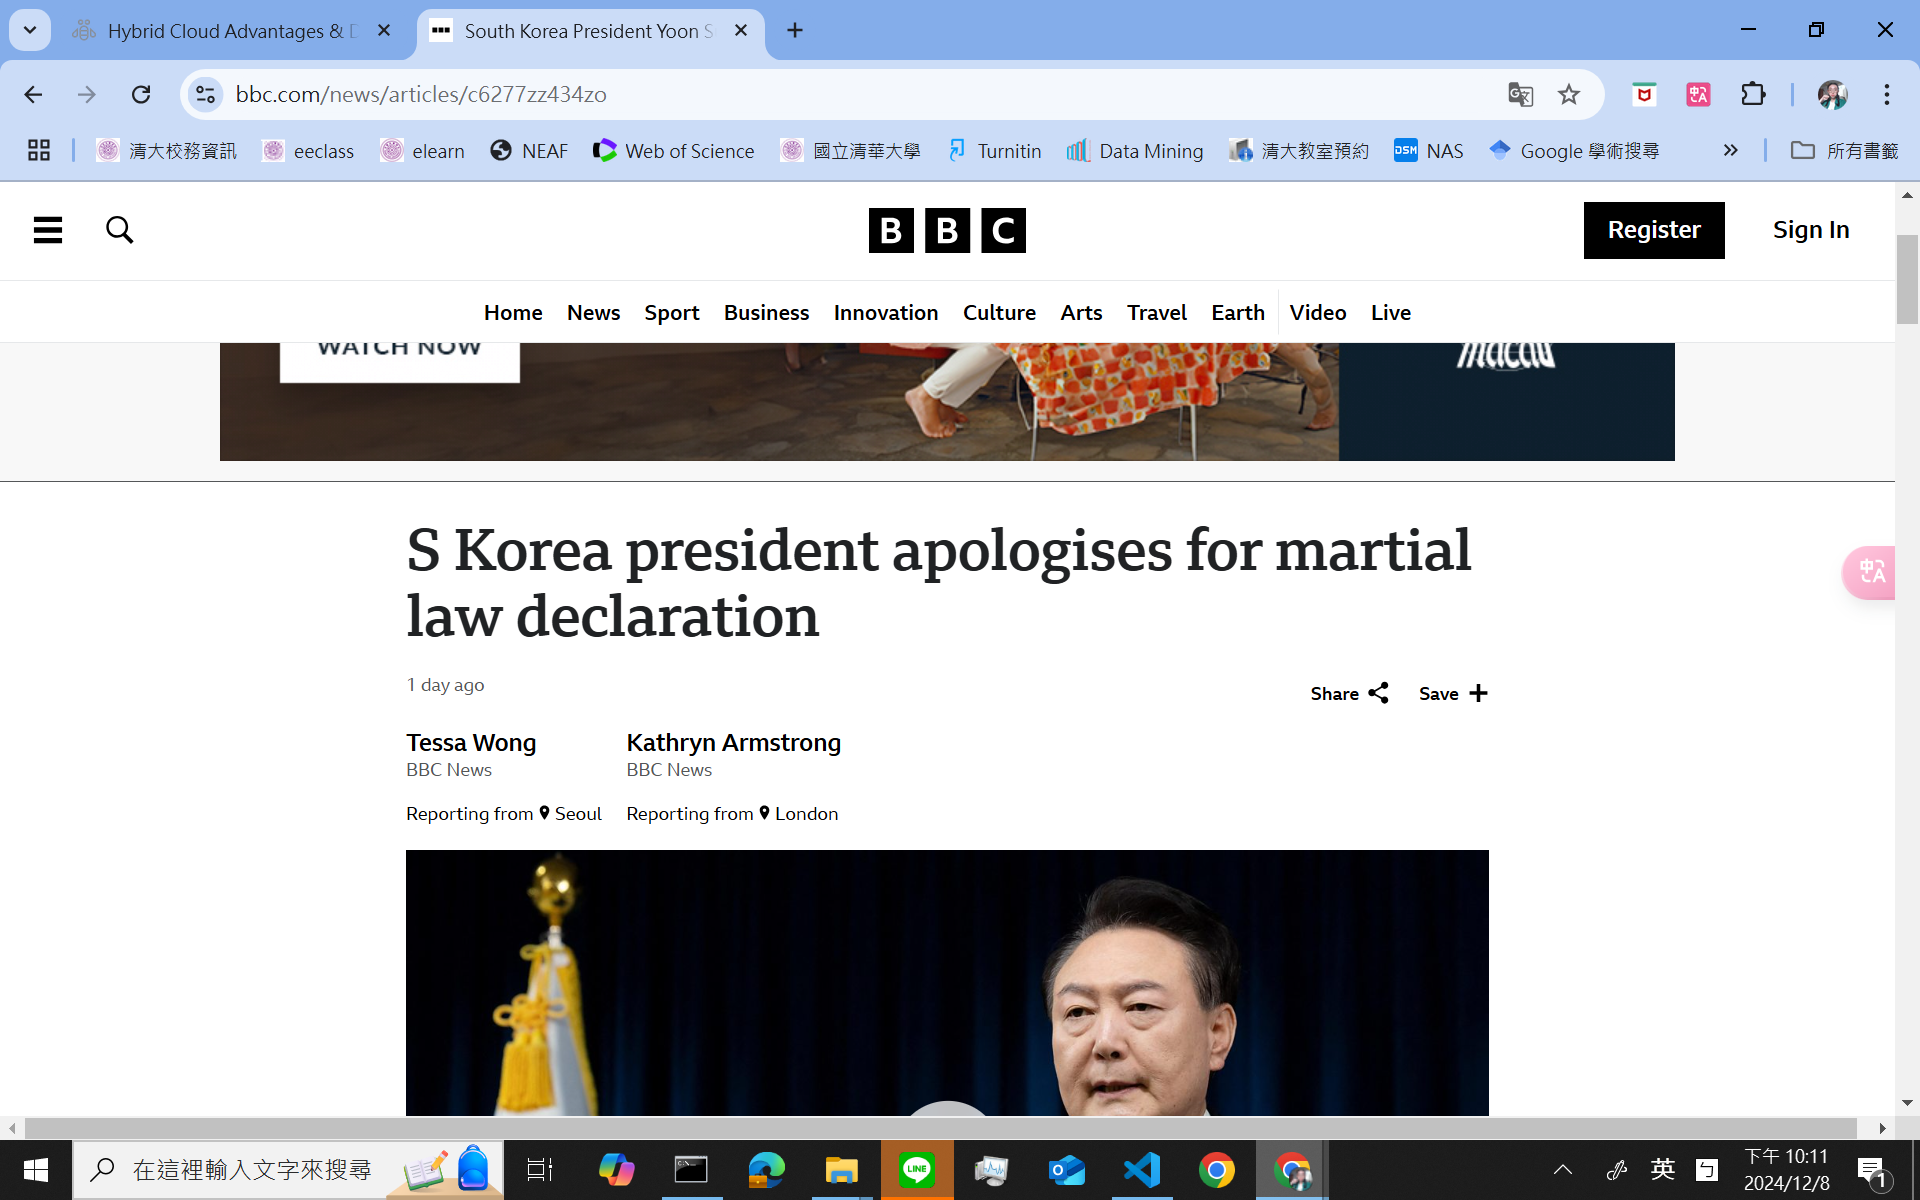
Q3 大致正確
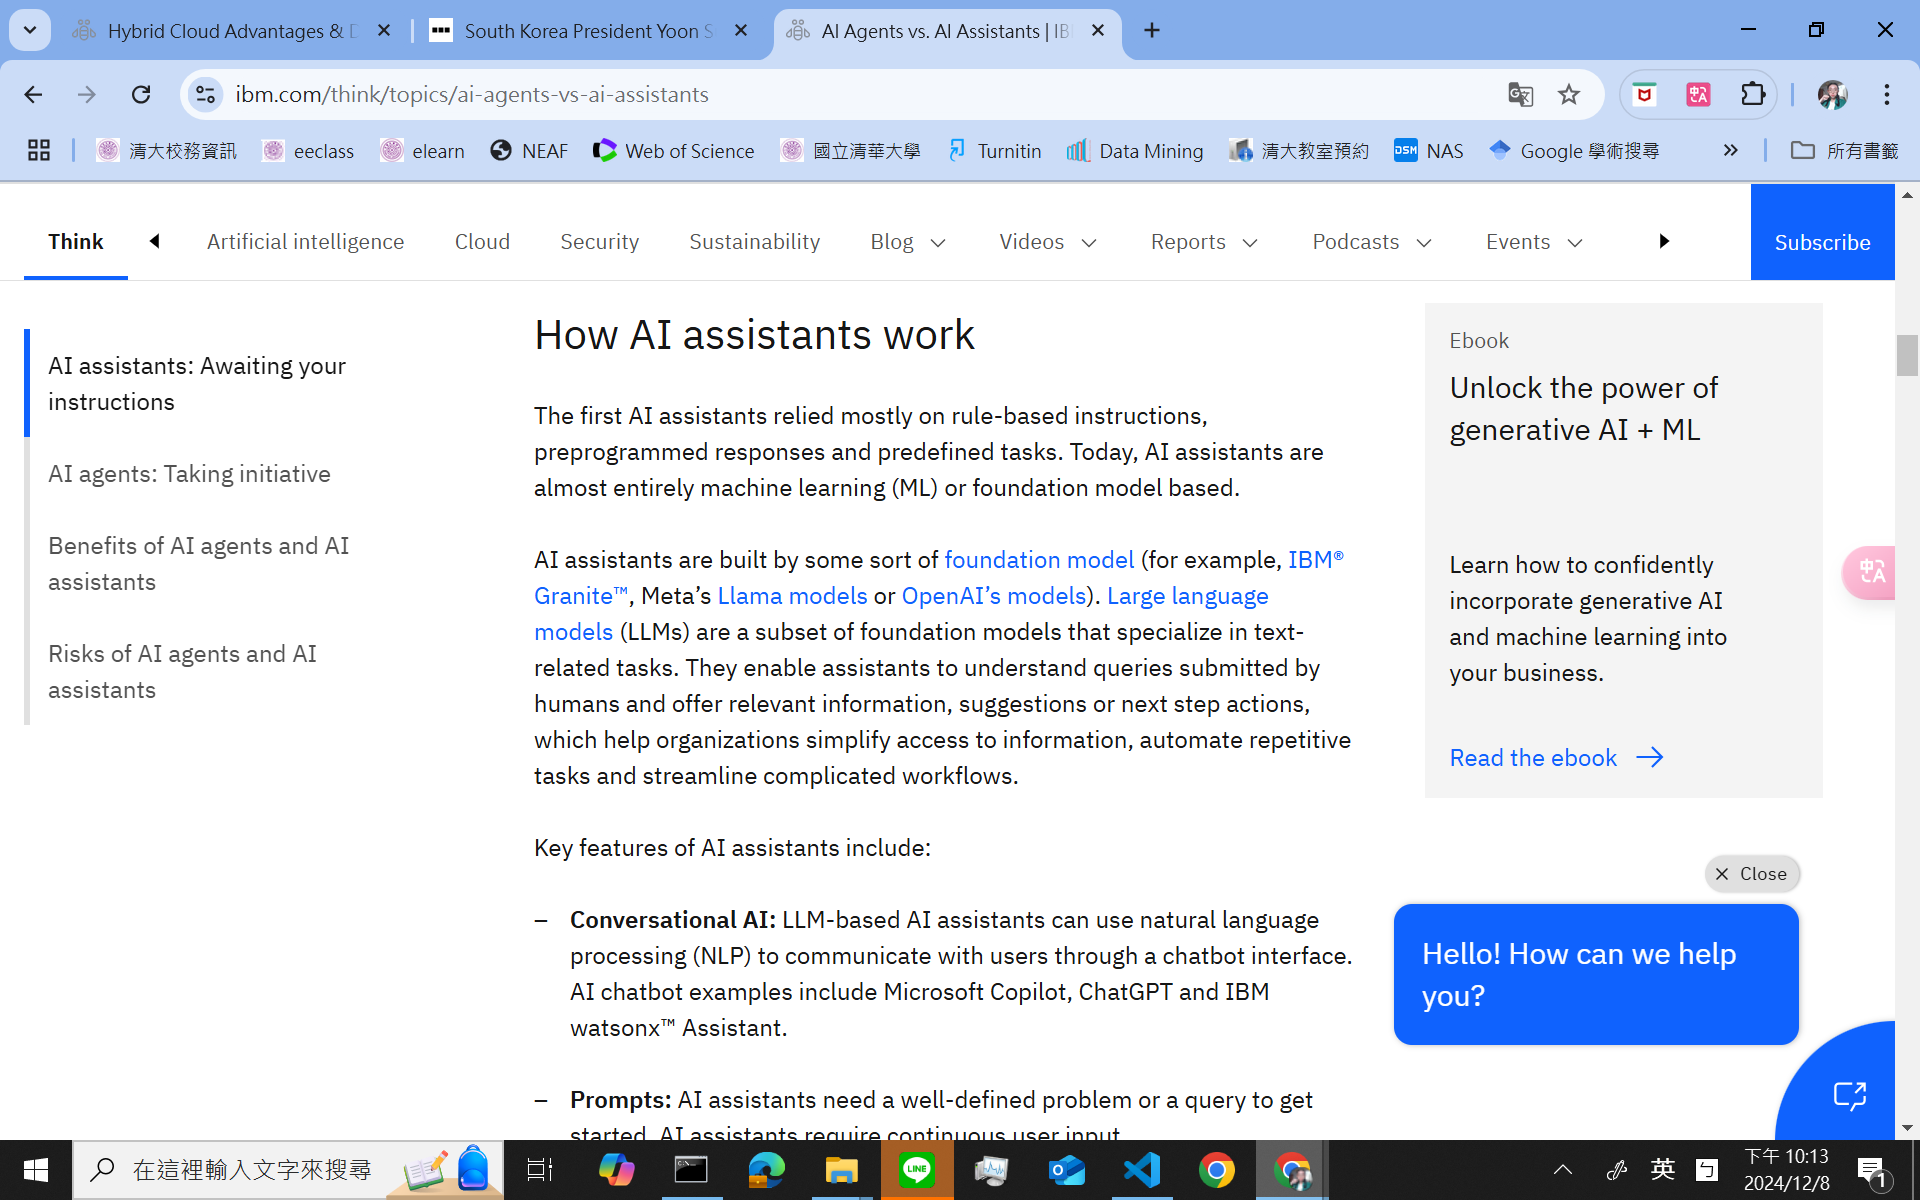

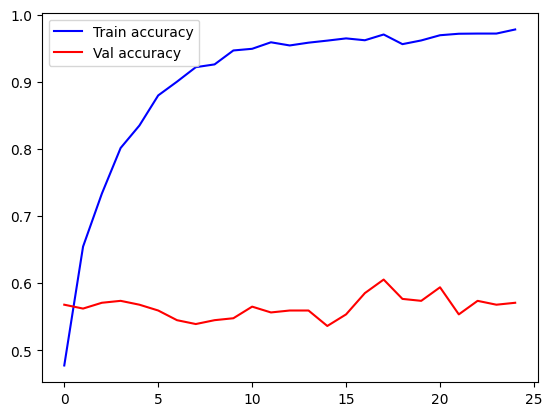

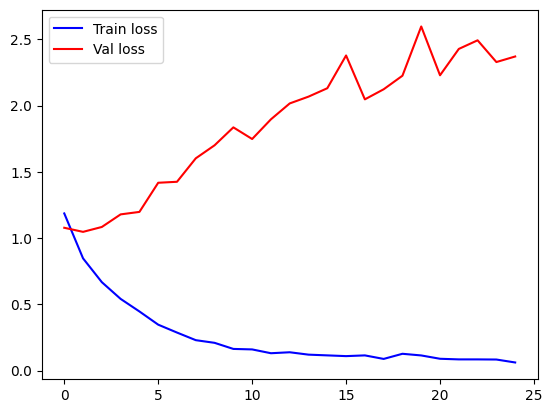

In [213]:
# Exercise 12 
# Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.
log2=pd.read_csv('logs/training_log_2.csv')
plt.plot(log2["epoch"],log2["accuracy"],'b-')
plt.plot(log2["epoch"],log2["val_accuracy"],'r-')
plt.legend(['Train accuracy','Val accuracy'])
plt.show()
plt.plot(log2["epoch"],log2["loss"],'b-')
plt.plot(log2["epoch"],log2["val_loss"],'r-')
plt.legend(['Train loss','Val loss'])
plt.show()

In [216]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

emotions = ['anger', 'fear', 'joy', 'sadness']
model_ollama = "llama3.2" 



You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: none. Asking for reclassification.
Invalid response: i cannot classify the text "google caffeine-an sprightly lengthening into the corridor re seo: wgj" as it appears to be a jumbled sequence of characters. can you provide another example?. Asking for reclassification.
Invalid response: none. Asking for reclassification.
Invalid response: none. Asking for reclassification.
Invalid response: none. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Accuracy: 52.50%
              precision    recall  f1-score   support

       anger       0.47      0.80      0.59        20
        fear 

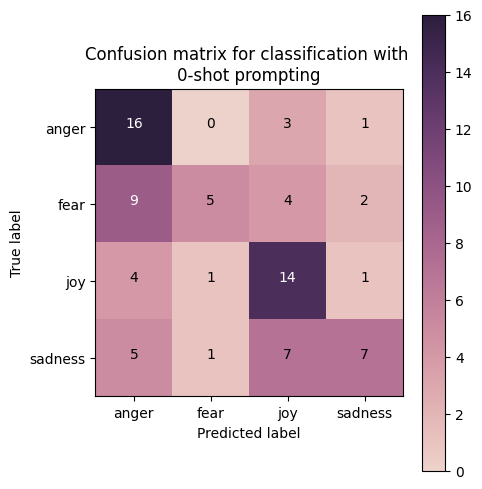


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Well @AprilDRyan Trump's rabid base needs 2 hear this &amp; U can always find an overseer like King to say it.\n@JoyAnnReid @SMShow @frangeladuo
Emotion: anger

Text: new tires &amp; an alarm system on my car. fwm now!
Emotion: fear

Text: Use your smile to change the world. Don't let the world change your smile.' #quote #actorslife #smile #love #hardworkpaysoff #fun
Emotion: joy

Text: and again dirty and  self loathing attitude  mope talking
Emotion: sadness


Accuracy: 52.50%
              precision    recall  f1-score   support

       anger       0.44      0.90      0.59        20
        fear       0.80      0.20    

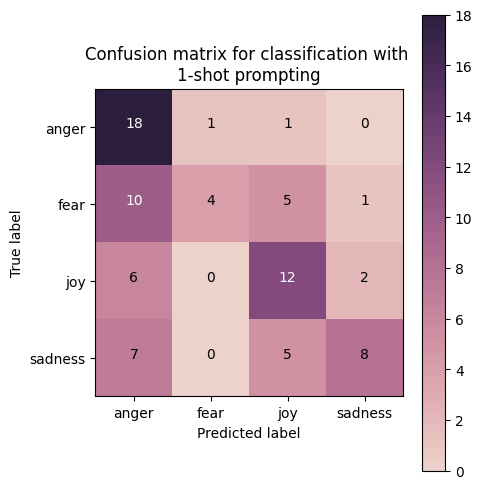


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Well @AprilDRyan Trump's rabid base needs 2 hear this &amp; U can always find an overseer like King to say it.\n@JoyAnnReid @SMShow @frangeladuo
Emotion: anger

Text: @fireemblemlord it's the first expac since wrath that feels like a proper 'evolution' of the game for me
Emotion: anger

Text: Bes! You don't just tell a true blooded hoopjunkie to switch a f*c@n' team that juz destroyed your own team. You juz don't! #insult
Emotion: anger

Text: So angry I wanna cry😢😢😢
Emotion: anger

Text: @nytopinion  The point of voting for Trump to push all the pieces off the board game like an angry toddler? Wreck everything for everybo

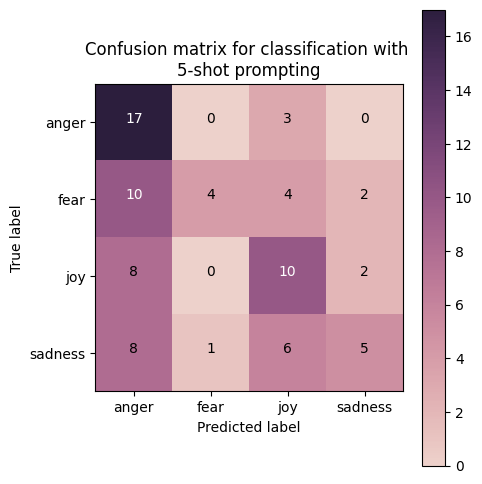

In [ ]:
# Exercise 13 
# Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.
run_experiment(df_train, df_test, test_samples=20, num_shots=0)
run_experiment(df_train, df_test, test_samples=20, num_shots=1)
run_experiment(df_train, df_test, test_samples=20, num_shots=5)
#Accuracy 0-shot = 1-shot 52.5% > 5-shot 45%
#anger is the easiest emotion to be classified
#second is joy
#precision 1-shot 62% > 0-shot 58% > 5-shot 55%
#recall 0-shot = 1-shot 53% > 5-shot 45%
#totally 1-shot > 0-shot >5-shot